In [66]:
import numpy as np
import os
from os.path import join
import json
import matplotlib.pyplot as plt
import pydicom as pdcm
import pylibjpeg

%matplotlib inline

In [6]:
# funtions:
def save_json(obj, file: str, indent: int = 4, sort_keys: bool = True) -> None:
    with open(file, 'w') as f:
        json.dump(obj, f, sort_keys=sort_keys, indent=indent)

In [7]:
path = r'C:\\Users\\MikołajStryja\\Documents\\Studia\\siim-covid19-detection'
subdirs = [f for f in os.listdir(path)]

In [8]:
test = subdirs[1]
train = subdirs[2]
train_image_level = subdirs[3]
train_study_level = subdirs[4]

In [9]:
cases = [d for d in os.listdir(os.path.join(path, train))]

In [10]:
metadata = {}
for case in cases:
    subcase = os.listdir(os.path.join(path, train, case))
    if len(subcase) > 1:
        dcms = [f for f in os.listdir(join(path, train, case, subcase[0])) if f.endswith('.dcm')]

    metadata[case] = join(path, train, case, subcase[0], os.listdir(join(path, train, case, subcase[0]))[0])
    

In [46]:
def get_path_from_metadata(id: str, metadata: dict):
    for key, val in metadata.items():
        if key==id:
            return val

In [11]:
file_name = 'metadata.json'

save_json(metadata, file_name)
    

In [12]:
dcm = pdcm.dcmread(metadata[cases[0]])
dcm.pixel_array

array([[1392, 1389, 1390, ...,    0,    0,    0],
       [1377, 1411, 1370, ...,    0,    0,    0],
       [1373, 1397, 1401, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 2476, 2490, 2453],
       [   0,    0,    0, ..., 2515, 2541, 2509],
       [   0,    0,    0, ..., 2517, 2489, 2488]], dtype=uint16)

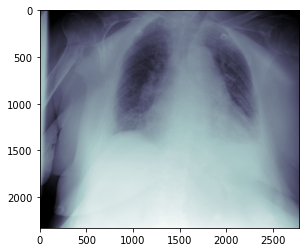

In [13]:
plt.imshow(dcm.pixel_array, cmap=plt.cm.bone) 

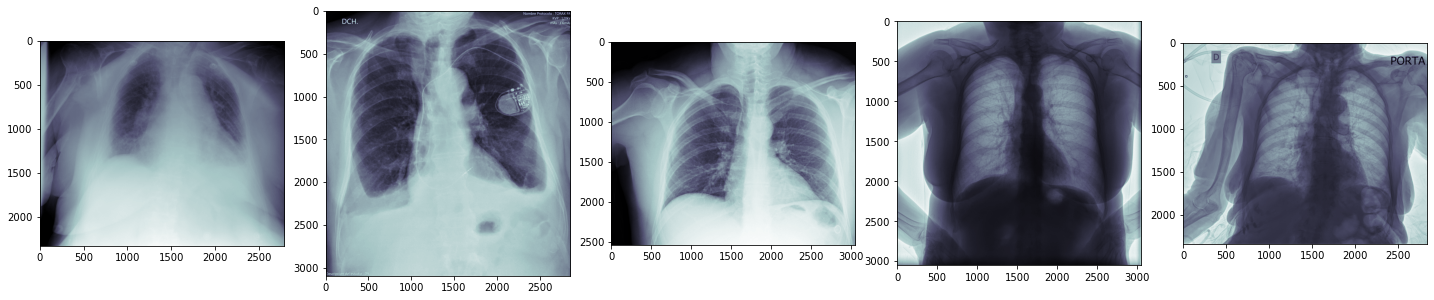

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
fig.tight_layout()

for i, case in enumerate(cases[:5]):
    axs[i].imshow(pdcm.dcmread(metadata[case]).pixel_array, cmap=plt.cm.bone)



In [21]:
test_dcm = pdcm.dcmread(metadata[cases[0]])
test_dcm.dir

<bound method Dataset.dir of Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.59189821846420219299438915042640676800
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: 71228e4340de
(0008, 0018) SOP Instance UID                    UI: 65761e66de9f
(0008, 0020) Study Date                          DA: '4545ba78b753'
(0008, 0030) Study Time                          TM: 'bf1677526b2b'
(0008, 0050) Accession Number                    SH: '5f20f119e3df'
(0008, 0060) Modality                            CS: 'DX'
(0009, 0010) Private Creator         

In [47]:
test_dcm.ImagerPixelSpacing

[0.148, 0.148]

In [17]:
import pandas as pd


In [30]:
pd_til = pd.read_csv(join(path, train_image_level))
pd_tsl = pd.read_csv(join(path, train_study_level))
pd_til.head()

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


In [31]:
pd_tsl.head()

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1


In [49]:
print(pd_tsl.iloc[0])
print(pd_tsl.iloc[0]['id'].split('_')[0])

id                          00086460a852_study
Negative for Pneumonia                       0
Typical Appearance                           1
Indeterminate Appearance                     0
Atypical Appearance                          0
Name: 0, dtype: object
00086460a852


In [151]:
print(pd_til.iloc[0])
print(type(pd_til.iloc[0]))
print(list(pd_til.columns))
id = pd_til.iloc[0]['id'].split('_')[0]
boxes = pd_til.iloc[0]['boxes']
label = pd_til.iloc[0]['label']
siUID = pd_til.iloc[0]['StudyInstanceUID']
count = 0
for elem in pd_til.iterrows():
    
    count += 1
    if count == 5:
        break


id                                                 000a312787f2_image
boxes               [{'x': 789.28836, 'y': 582.43035, 'width': 102...
label               opacity 1 789.28836 582.43035 1815.94498 2499....
StudyInstanceUID                                         5776db0cec75
Name: 0, dtype: object
<class 'pandas.core.series.Series'>
['id', 'boxes', 'label', 'StudyInstanceUID']


In [172]:
def get_dict_image_level(dataset_case, columns):
    id = columns.index('id')
    boxes = columns.index('boxes')
    label = columns.index('label')
    study_instance = columns.index('StudyInstanceUID')

    id = dataset_case[id].split('_')[0]
    if pd.isnull(dataset_case[boxes]):
        boxes = {}
    
    else:
        boxes = ast.literal_eval(dataset_case[boxes])
    label = dict_from_str(dataset_case[label])
    study_instance = dataset_case[study_instance]

    return (id, boxes, label, study_instance)

def get_dict_study_level(dataset_case, columns):
    
    pass


def dict_from_str(string: str) -> dict:
    elem_list = string.split(' ')
    opacities_idx = [i for i,x in enumerate(elem_list) if x=='opacity']
    count = 0
    label_dict = {}
    for elem in elem_list:
        if elem=='opacity':
            name = 'opacity_' + str(count)
            if count == len(opacities_idx) - 1:
                label_dict[name] = np.array([float(x) for x in elem_list[opacities_idx[count] + 1:]])

            else:
                label_dict[name] = np.array([float(x) for x in elem_list[opacities_idx[count] + 1:opacities_idx[count+1]]])
            count += 1

    return label_dict

A = get_dict_image_level(pd_til.iloc[0], list(pd_til.columns))
A

('000a312787f2',
 [{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292},
  {'x': 2245.91208,
   'y': 591.20528,
   'width': 1094.66162,
   'height': 1761.54944}],
 {'opacity_0': array([1.00000000e+00, 7.89288360e+02, 5.82430350e+02, 1.81594498e+03,
         2.49973327e+03]),
  'opacity_1': array([1.00000000e+00, 2.24591208e+03, 5.91205280e+02, 3.34057370e+03,
         2.35275472e+03])},
 '5776db0cec75')

In [177]:
columns = list(pd_til.columns)
pd_til_dict = {}
for elem in pd_til.iterrows():
    temp = get_dict_image_level(elem[1], columns)
    pd_til_dict[temp[0]] = temp[1:]
    

In [180]:
pd_til_dict.__len__()

6334

In [122]:
import ast
print(ast.literal_eval(boxes)[0])
label.split(' ')
label_dict = {}
count = 0
elem_list = label.split(' ')
print(elem_list)
opacities_idx = [i for i,x in enumerate(elem_list) if x=='opacity']
print(opacities_idx)
for elem in elem_list:
    if elem=='opacity':
        name = 'opacity_' + str(count)
        if count == len(opacities_idx) - 1:
            label_dict[name] = np.array([float(x) for x in elem_list[opacities_idx[count] + 1:]])
        
        else:
            label_dict[name] = np.array([float(x) for x in elem_list[opacities_idx[count] + 1:opacities_idx[count+1]]])
        count += 1

print(label_dict)

print(siUID)

{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}
['opacity', '1', '789.28836', '582.43035', '1815.94498', '2499.73327', 'opacity', '1', '2245.91208', '591.20528', '3340.5737', '2352.75472']
[0, 6]
{'opacity_0': array([1.00000000e+00, 7.89288360e+02, 5.82430350e+02, 1.81594498e+03,
       2.49973327e+03]), 'opacity_1': array([1.00000000e+00, 2.24591208e+03, 5.91205280e+02, 3.34057370e+03,
       2.35275472e+03])}
5776db0cec75


In [181]:
print(pd_tsl.iloc[0])
print(type(pd_tsl.iloc[0]))
print(list(pd_tsl.columns))

id                          00086460a852_study
Negative for Pneumonia                       0
Typical Appearance                           1
Indeterminate Appearance                     0
Atypical Appearance                          0
Name: 0, dtype: object
<class 'pandas.core.series.Series'>
['id', 'Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance']


In [184]:
def get_dict_study_level(case_study, columns):
    id = columns.index('id')
    NP = columns.index('Negative for Pneumonia')
    TA = columns.index('Typical Appearance')
    IA = columns.index('Indeterminate Appearance')
    AA = columns.index('Atypical Appearance')

    id = case_study[columns[id]].split('_')[0]
    NP = case_study[columns[NP]]
    TA = case_study[columns[TA]]
    IA = case_study[columns[IA]]
    AA = case_study[columns[AA]]

    return (id, NP, TA, IA, AA)

B = get_dict_study_level(pd_tsl.iloc[0], list(pd_tsl.columns))

In [185]:
B

('00086460a852', 0, 1, 0, 0)

In [186]:
columns_study = list(pd_tsl.columns)
pd_tsl_dict = {}
for elem in pd_tsl.iterrows():
    temp = get_dict_study_level(elem[1], columns_study)
    pd_tsl_dict[temp[0]] = temp[1:]

In [188]:
pd_tsl_dict.__len__()

6054

In [199]:
from itertools import chain
uniqueKeyList = list(set(chain.from_iterable(value.keys() for value in [pd_tsl_dict, pd_til_dict])))

In [203]:
for a in list(pd_til_dict.keys()):
    for b in list(pd_tsl_dict.keys()):
        if a == b:
            print(a)